In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
# from tensorflow import keras
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv('Bank Marketing.csv',sep=';')
df_original = df

In [3]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.replace('unknown', np.NAN, inplace=True)

In [7]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [8]:
# if there is null dropna
df.dropna(inplace=True)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30488.0,39.030012,10.333529,17.000,31.000,37.000,45.000,95.000
duration,30488.0,259.484092,261.714262,0.000,103.000,181.000,321.000,4918.000
campaign,30488.0,2.521451,2.720150,1.000,1.000,2.000,3.000,43.000
pdays,30488.0,956.332295,201.373292,0.000,999.000,999.000,999.000,999.000
previous,30488.0,0.194273,0.522788,0.000,0.000,0.000,0.000,7.000
emp.var.rate,30488.0,-0.071510,1.610399,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,30488.0,93.523311,0.585374,92.201,93.075,93.444,93.994,94.767
cons.conf.idx,30488.0,-40.602263,4.789249,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,30488.0,3.459938,1.777231,0.634,1.313,4.856,4.961,5.045
nr.employed,30488.0,5160.813409,75.158065,4963.600,5099.100,5191.000,5228.100,5228.100


<ipython-input-10-f7cea001248c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], color = 'blue')


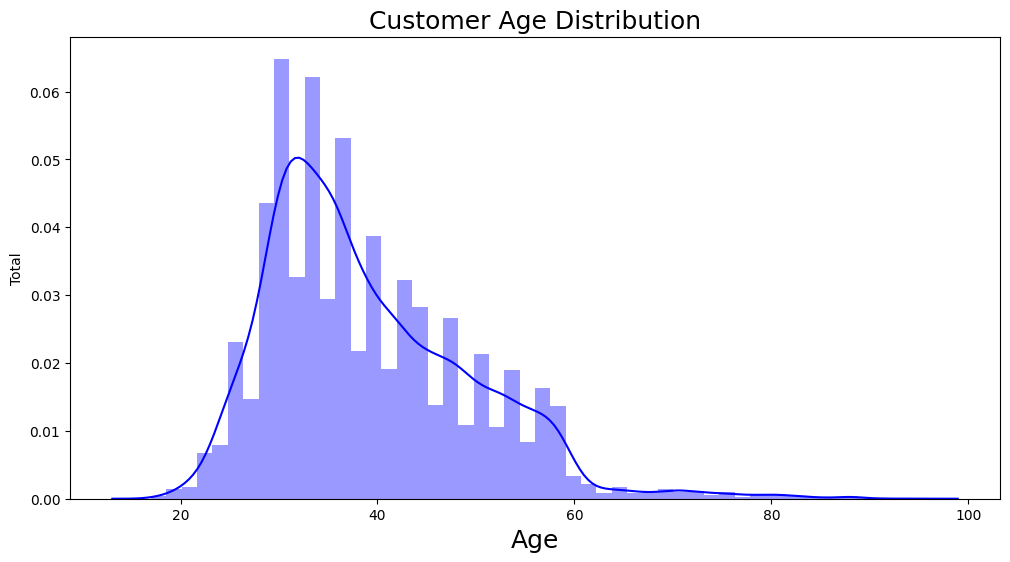

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(12, 6))
sns.distplot(df['age'], color = 'blue')
plt.title('Customer Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Total')
plt.show()
plt.clf()

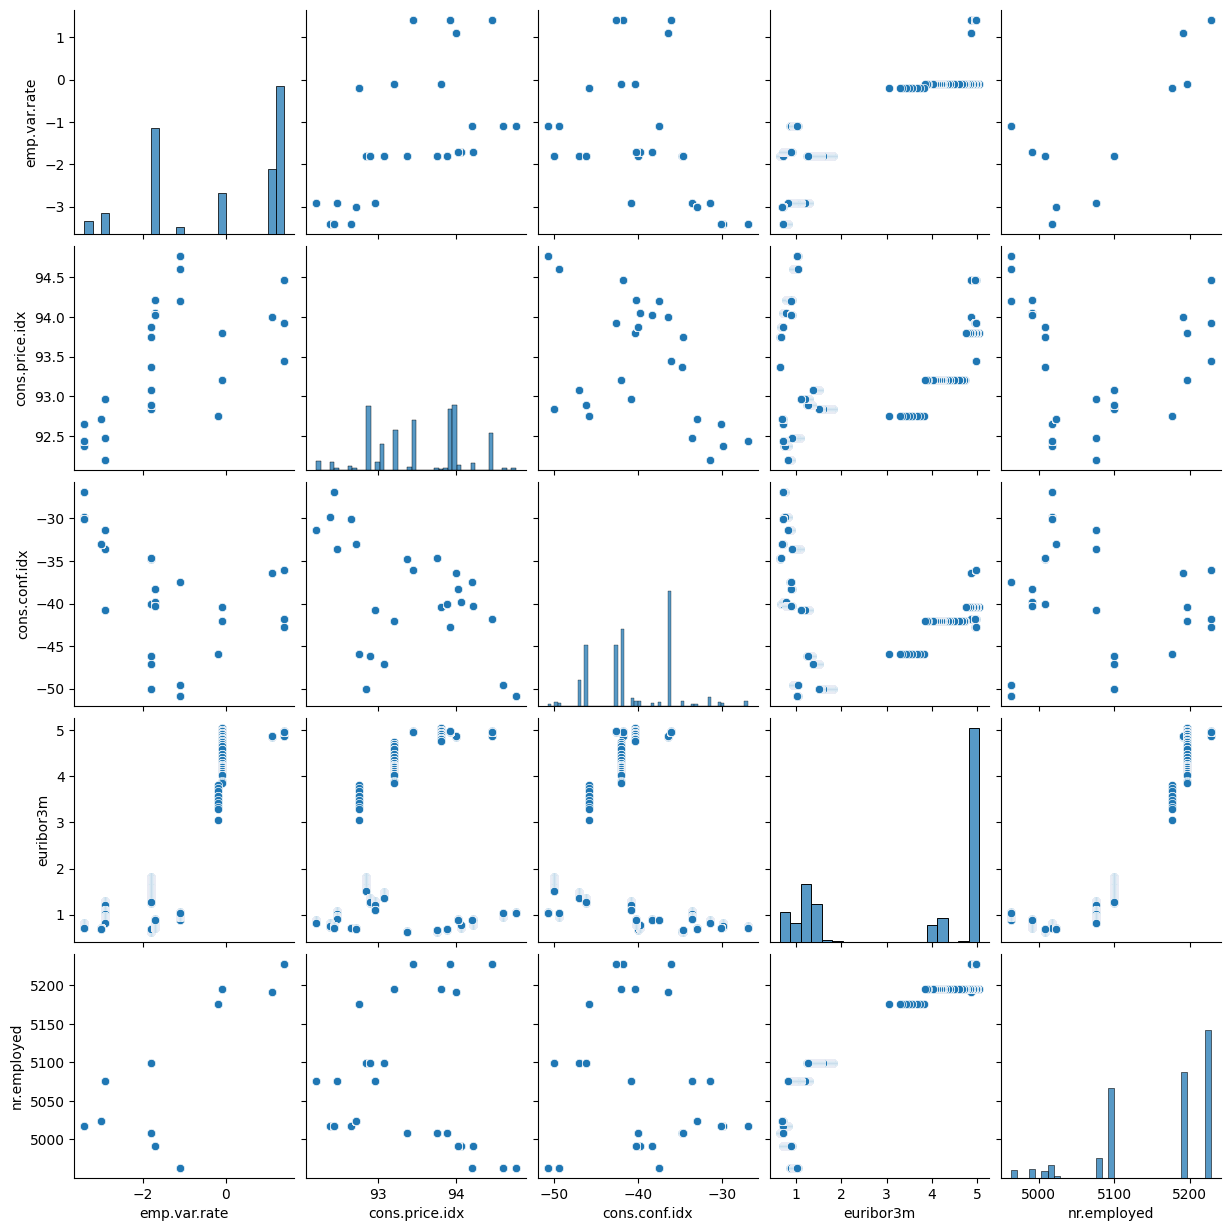

<Figure size 640x480 with 0 Axes>

In [12]:
sns.pairplot(df.select_dtypes('float'))
plt.show()
plt.clf()

In [13]:
## Check for unique values of categorical variables
df_obj = df.select_dtypes('object')
df_uniques = pd.DataFrame([[i, len(df_obj[i].unique())] for i in df_obj.columns], columns=['Variable','Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
job,11
marital,3
education,7
default,2
housing,2
loan,2
contact,2
month,10
day_of_week,5


In [14]:
## Find Binary Variables
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['default', 'housing', 'loan', 'contact', 'y']

In [15]:
## Leftover Categorical Variables
categorical_variables = list(set(df_obj) - set(binary_variables))
categorical_variables

['marital', 'education', 'job', 'day_of_week', 'month', 'poutcome']

In [16]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [17]:
lb, le = LabelBinarizer(), LabelEncoder()

In [18]:
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

In [19]:
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)
df.describe()

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,...,30488.000000,30488.000000,30488.000000,30488.000000,30488.00000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,0.000098,0.541885,0.156389,0.329474,259.484092,2.521451,956.332295,0.194273,-0.071510,...,0.005150,0.166656,0.118538,0.015809,0.31924,0.114668,0.021057,0.016236,0.847415,0.039065
std,10.333529,0.009919,0.498251,0.363230,0.470030,261.714262,2.720150,201.373292,0.522788,1.610399,...,0.071577,0.372674,0.323250,0.124740,0.46619,0.318626,0.143578,0.126384,0.359593,0.193752
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,0.000000,0.000000,0.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,0.000000,1.000000,0.000000,0.000000,181.000000,2.000000,999.000000,0.000000,1.100000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,45.000000,0.000000,1.000000,0.000000,1.000000,321.000000,3.000000,999.000000,0.000000,1.400000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
X = df.drop(['y'], axis=1)
X

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,56,0,0,0,1,261,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
2,37,0,1,0,1,226,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
3,40,0,0,0,1,151,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
4,56,0,0,1,1,307,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
6,59,0,0,0,1,139,1,999,0,1.1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,0,334,1,999,0,-1.1,...,0,0,0,0,0,1,0,0,1,0
41184,46,0,0,0,0,383,1,999,0,-1.1,...,0,0,0,0,0,1,0,0,1,0
41185,56,0,1,0,0,189,2,999,0,-1.1,...,0,0,0,0,0,1,0,0,1,0
41186,44,0,0,0,0,442,1,999,0,-1.1,...,0,0,0,0,0,1,0,0,1,0


In [21]:
y = df["y"].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# X = df.iloc[:, :-1].values
# y = df["y"].values

scaler = StandardScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (21341, 47)
y_train shape (21341,)
X_test shape (9147, 47)
y_test shape (9147,)


#NN 1

In [23]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [24]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy', optimizer='sgd',metrics='accuracy')

In [26]:
run_hist= model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
667/667 [==============================] - 3s 3ms/step - loss: 0.3354 - accuracy: 0.8750 - val_loss: 0.2857 - val_accuracy: 0.8841
Epoch 2/50
667/667 [==============================] - 2s 2ms/step - loss: 0.2614 - accuracy: 0.8907 - val_loss: 0.2506 - val_accuracy: 0.8942
Epoch 3/50
667/667 [==============================] - 2s 2ms/step - loss: 0.2379 - accuracy: 0.8959 - val_loss: 0.2352 - val_accuracy: 0.8957
Epoch 4/50
667/667 [==============================] - 3s 5ms/step - loss: 0.2267 - accuracy: 0.8974 - val_loss: 0.2275 - val_accuracy: 0.8959
Epoch 5/50
667/667 [==============================] - 3s 5ms/step - loss: 0.2201 - accuracy: 0.8984 - val_loss: 0.2220 - val_accuracy: 0.8982
Epoch 6/50
667/667 [==============================] - 2s 3ms/step - loss: 0.2156 - accuracy: 0.8993 - val_loss: 0.2185 - val_accuracy: 0.8971
Epoch 7/50
667/667 [==============================] - 3s 5ms/step - loss: 0.2122 - accuracy: 0.9003 - val_loss: 0.2159 - val_accuracy: 0.8979
Epoch 

In [27]:
y_hat = model.predict(X_test)
y_hat = [0 if val <0.5 else 1 for val in y_hat]

286/286 [==============================] - 0s 1ms/step


In [28]:
accuracy_score(y_test, y_hat)

0.901388433366131

In [29]:
run_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

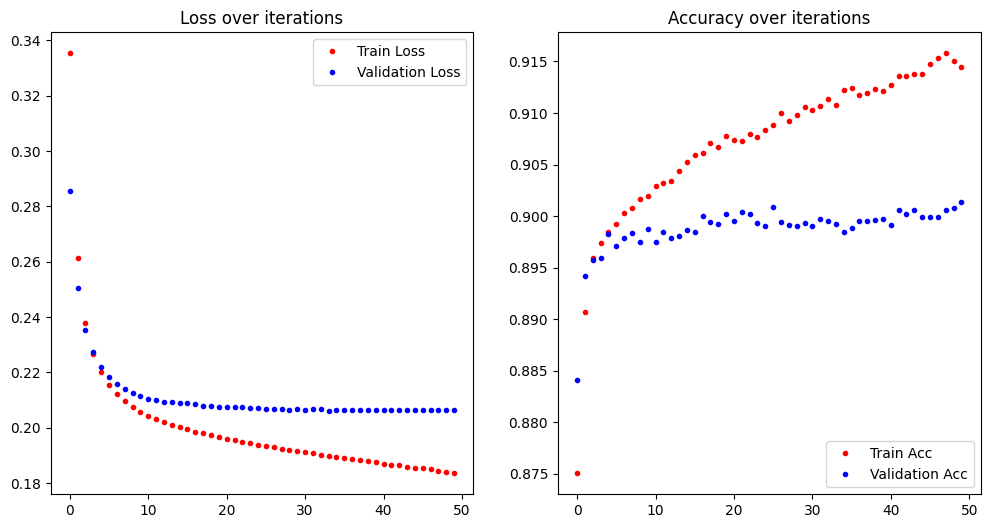

In [30]:
n = len(run_hist.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

# NN 2

In [31]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model_1 = Sequential()
model_1.add(layers.Dense(50, activation='sigmoid', input_shape = (X_train.shape[1],)))
model_1.add(layers.Dense(1, activation='linear'))
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 50)                2400      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2451 (9.57 KB)
Trainable params: 2451 (9.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
model_1.compile(optimizer='sgd', loss = 'mean_squared_error')
# model_1.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=30)
run_hist_1 = model_1.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=30)

Epoch 1/30
667/667 [==============================] - 2s 3ms/step - loss: 0.0943 - val_loss: 0.0775
Epoch 2/30
667/667 [==============================] - 2s 4ms/step - loss: 0.0747 - val_loss: 0.0740
Epoch 3/30
667/667 [==============================] - 2s 3ms/step - loss: 0.0732 - val_loss: 0.0731
Epoch 4/30
667/667 [==============================] - 2s 3ms/step - loss: 0.0728 - val_loss: 0.0730
Epoch 5/30
667/667 [==============================] - 1s 2ms/step - loss: 0.0727 - val_loss: 0.0724
Epoch 6/30
667/667 [==============================] - 1s 2ms/step - loss: 0.0724 - val_loss: 0.0732
Epoch 7/30
667/667 [==============================] - 1s 2ms/step - loss: 0.0723 - val_loss: 0.0723
Epoch 8/30
667/667 [==============================] - 1s 2ms/step - loss: 0.0721 - val_loss: 0.0733
Epoch 9/30
667/667 [==============================] - 1s 2ms/step - loss: 0.0720 - val_loss: 0.0723
Epoch 10/30
667/667 [==============================] - 2s 2ms/step - loss: 0.0718 - val_loss: 0.0727

In [33]:
preds = model.predict(X_test)
preds

286/286 [==============================] - 1s 2ms/step


array([[6.1166505e-03],
       [1.5567847e-02],
       [1.2044033e-04],
       ...,
       [1.0622130e-02],
       [1.3217236e-02],
       [7.0394090e-05]], dtype=float32)

In [34]:
preds_1 = [0 if val <0.5 else 1 for val in preds]
accuracy_score(y_test, preds_1)

0.901388433366131

In [35]:
preds = model.predict(X_test).reshape(-1,)
preds

286/286 [==============================] - 0s 1ms/step


array([6.1166505e-03, 1.5567847e-02, 1.2044033e-04, ..., 1.0622130e-02,
       1.3217236e-02, 7.0394090e-05], dtype=float32)

In [36]:
res = pd.DataFrame()
res['Actual'] = y_test
res['Preds'] =preds
res


,Actual,Preds
0,0,0.006117
1,0,0.015568
2,0,0.000120
3,0,0.000005
4,0,0.003736
...,...,...
9142,0,0.149564
9143,1,0.665362
9144,0,0.010622
9145,1,0.013217


In [37]:
run_hist_1.history.keys()

dict_keys(['loss', 'val_loss'])

<Figure size 1200x800 with 0 Axes>

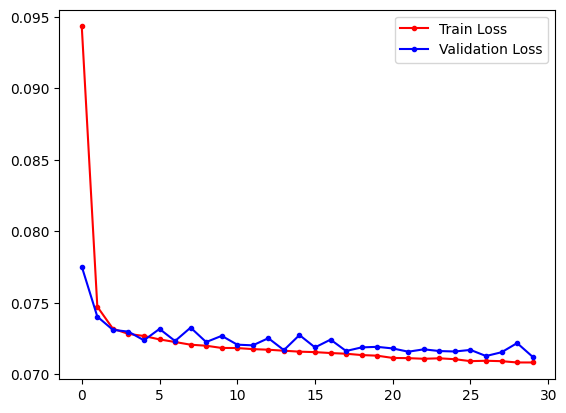

In [38]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#NN 3

In [39]:
model_2 = Sequential()
model_2.add(Dense(50,input_shape = (47,),activation = 'sigmoid'))
model_2.add(Dense(1,activation = 'sigmoid'))

In [40]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                2400      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2451 (9.57 KB)
Trainable params: 2451 (9.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
## Convert dataframe back to array
X_train_norm = X_train.to_numpy()
X_test_norm = X_test.to_numpy()

In [43]:
## Import Keras objects for Deep Learning
# from keras.models  import Sequential
# from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [44]:
# Fit(Train) the Model
# Compile the model with Optimizer, Loss Function and Metric

model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=300, verbose=0)

In [46]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<Figure size 1200x800 with 0 Axes>

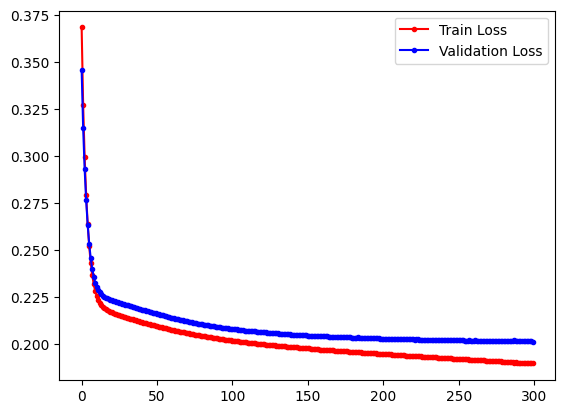

In [47]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#NN 4

In [48]:
model_3 = Sequential()
model_3.add(Dense(25, input_shape=(47,), activation="relu"))
model_3.add(Dense(25,  activation="relu"))
model_3.add(Dense(1, activation="sigmoid"))

model_3.compile(Adam(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=300, verbose=0)

In [49]:
run_hist_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Accuracy over iterations')

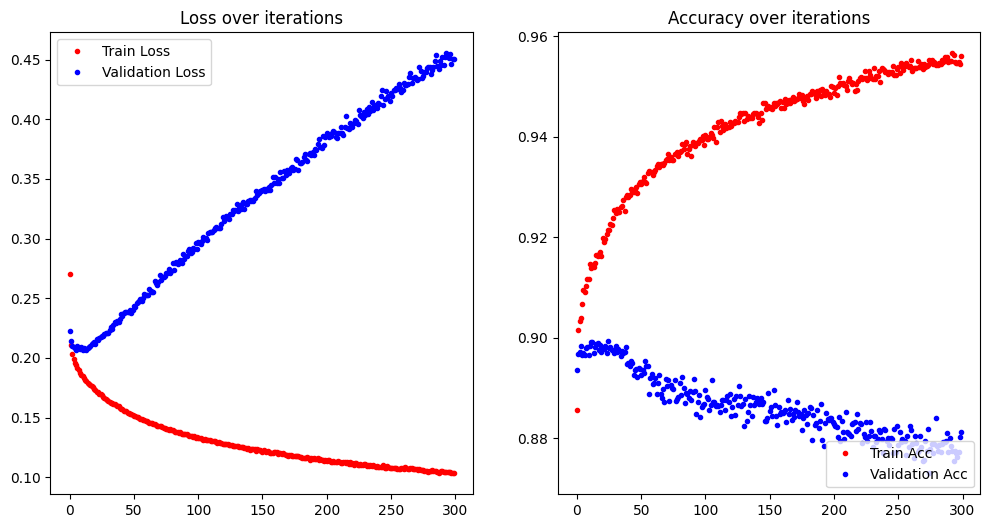

In [50]:
n = len(run_hist_3.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_3.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_3.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_3.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_3.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

<Figure size 1200x800 with 0 Axes>

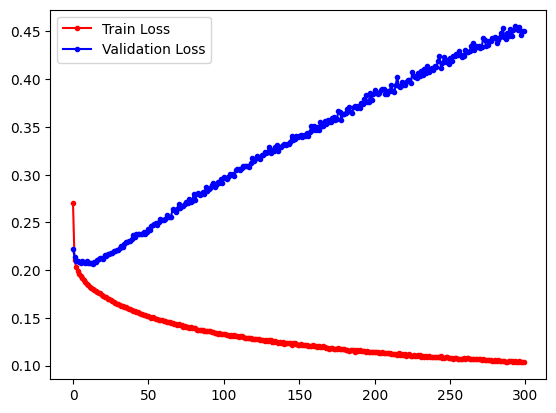

In [51]:
plt.figure(figsize=(12,8))
fig, ax = plt.subplots()
ax.plot(run_hist_3.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_3.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()